In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Plot parameters
sns.set()
# Seven hls color palette
current_palette_7 = sns.color_palette("hls", 7)
sns.set_palette(current_palette_7)

%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# rcParams.keys()

Populating the interactive namespace from numpy and matplotlib


In [8]:
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

In [12]:
def plotVectors(vecs, cols):
    plt.figure()
    print len(vecs)
    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
#     y = np.concatenate([[0,0],vecs[1]])
    

        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=1/float((len(vecs))))

#     plt.xlim(-1, 2)
#     plt.ylim(-1, 2)
    plt.axvline(x=0, color='grey')
    plt.axhline(y=0, color='grey')

#     plt.text(1, 1.5, r'$\vec{u}$', size=18)
#     plt.text(1.5, -1, r'$\vec{v}$', size=18)

#     plt.show()
#     plt.close()


# 2.7 Eigendecomposition

# Eigenvectors and eigenvalues

- The number of eigenvalue/eigenvector corresponds to the number of dimension of our data.
- The eigenvector tells us the direction and the eigenvalue the amount of variance when data is projected on the axis of the corresponding eigenvector.
- The eigenvector of the maximum eigenvalue is the principal component (i.e axis where the variance is maximum when data is projetted on).

Let's say that $\boldsymbol{A}$ is a matrix. This matrix $\boldsymbol{A}$ can *act* on a vector $\boldsymbol{v}$ and output another vector $\boldsymbol{Av}$. It will input the vector $\boldsymbol{v}$ and output the vector $\boldsymbol{Av}$.

The eigenvectors of a matrix are the output vectors that are in the same direction than the input vectors. This means that $\boldsymbol{v}$ is a eigenvector of $\boldsymbol{A}$ if $\boldsymbol{v}$ and $\boldsymbol{Av}$ are in the same direction that is if the vectors $\boldsymbol{Av}$ and $\boldsymbol{v}$ are parallel. The output vector is just a scaled version of the input vector. This scalling factor is $\lambda$ and is called the **eigenvalue** of $\boldsymbol{A}$.

$$
\boldsymbol{Av} = \lambda\boldsymbol{v}
$$

### Example 1 (from [1])

Let's $\boldsymbol{A}$ be the following matrix

$
\boldsymbol{A}=
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix}
$

One eigenvector of A is

$
\boldsymbol{v}=
\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}
$

We can check that $\boldsymbol{Av} = \lambda\boldsymbol{v}$:

$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix} \times \begin{bmatrix}
    1\\\\
    1
\end{bmatrix}=\begin{bmatrix}
    6\\\\
    6
\end{bmatrix}
$

We can see that

$
6\times \begin{bmatrix}
    1\\\\
    1
\end{bmatrix} = \begin{bmatrix}
    6\\\\
    6
\end{bmatrix}
$

which means that $\boldsymbol{v}$ is well an eigenvector of $\boldsymbol{A}$. Also, the corresponding eigenvalue is $\lambda=6$.

We can represent $\boldsymbol{x}$ and $\boldsymbol{Ax}$ to check that their directions are the same:

A:
[[5 1]
 [3 3]]
v:
[[1]
 [1]]
Av:
[[6]
 [6]]
2


(-1, 7)

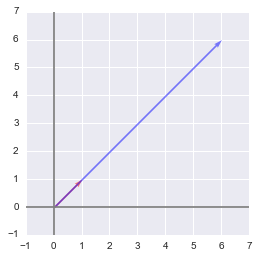

In [13]:
A = np.array([[5,1], [3, 3]])
print 'A:\n', A
v = np.array([[1], [1]])
print 'v:\n', v
Av = np.dot(A, v)
print 'Av:\n', Av

plotVectors([v.flatten(), Av.flatten()], cols=['red', 'blue'])
plt.ylim(-1, 7)
plt.xlim(-1, 7)

Another eigenvector of $\boldsymbol{A}$ is

$
\boldsymbol{v}=
\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}
$

because

$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix} \times \begin{bmatrix}
    1\\\\
    -3
\end{bmatrix} = \begin{bmatrix}
    2\\\\
    -6
\end{bmatrix}
$

and
$
2 \times \begin{bmatrix}
    1\\\\
    -3
\end{bmatrix} =
\begin{bmatrix}
    2\\\\
    -6
\end{bmatrix}
$

So the corresponding eigenvalue is $\lambda=2$.

v:
[[ 1]
 [-3]]
Av:
[[ 2]
 [-6]]
2


(-1, 3)

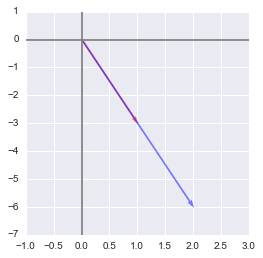

In [14]:
v = np.array([[1], [-3]])
print 'v:\n', v
Av = np.dot(A, v)
print 'Av:\n', Av

plotVectors([v.flatten(), Av.flatten()], cols=['red', 'blue'])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

This example shows that the eigenvector $\boldsymbol{v}$ is a vector that changes only in scale when we apply it to the matrix $\boldsymbol{A}$. Here the scales were 6 for the first eigenvector and 2 to the second but $\lambda$ can take any real or even complex value.

## Find eigenvalues and eigenvectors in Python

Numpy provides a function returning eigenvectors and eigenvalues (the first array corresponds to the eigenvalues and the second to the eigenvectors concatenated in columns):

```python
(array([ 6.,  2.]), array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]]))
```

Here a demonstration with the preceding example.

In [15]:
A = np.array([[5, 1], [3, 3]])
print 'A:\n', A
print '\nEigenvalues and eigenvectors from np.linalg.eig(A):\n', np.linalg.eig(A)

A:
[[5 1]
 [3 3]]

Eigenvalues and eigenvectors from np.linalg.eig(A):
(array([ 6.,  2.]), array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]]))


We can see that the eigenvalues are the same than the ones we used before: 6 and 2 (first array).

The eigenvectors correspond to the columns of the second array. This means that the eigenvector corresponding to $\lambda=6$ is $\begin{bmatrix}
    0.70710678\\\\
    0.70710678
\end{bmatrix}$ and the eigenvector corresponding to $\lambda=2$ is $\begin{bmatrix}
    -0.31622777\\\\
    0.9486833
\end{bmatrix}$.

The eigenvectors look different because they have not necessarly the same scaling than the ones we gave in the example. We can easily see that the first corresponds to a scaled version of our $\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}$.

For the second we need to check that it corresponds to a scaled version of $\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}$ so let's draw these vectors and see if they are parallel.

v:
[[ 1]
 [-3]]
Av:
[[ 2]
 [-6]]
3


(-1, 3)

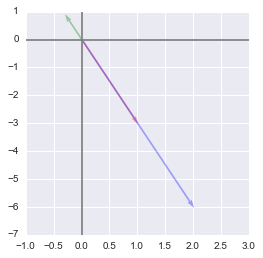

In [16]:
v = np.array([[1], [-3]])
print 'v:\n', v
Av = np.dot(A, v)
print 'Av:\n', Av
v_np = [-0.31622777, 0.9486833]

plotVectors([v.flatten(), Av.flatten(), v_np], cols=['red', 'blue', 'green'])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

We can see that the vector found with numpy (in green) is well a scaled version of our preceding $\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}$.

## Rescaled vectors

As we saw it with numpy, if $\boldsymbol{v}$ is an eigenvector of $\boldsymbol{A}$, then any rescaled vector $s\boldsymbol{v}$ is also an eigenvector of $\boldsymbol{A}$. The eigenvalue of the rescaled vector is the same.

Let's try to rescale $
\boldsymbol{v}=
\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}
$ from our preceding example. 

For instance,

$
\boldsymbol{3v}=
\begin{bmatrix}
    3\\\\
    -9
\end{bmatrix}
$

$
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix} \times
\begin{bmatrix}
    3\\\\
    -9
\end{bmatrix} =
\begin{bmatrix}
    6\\\\
    18
\end{bmatrix} = 2 \times
\begin{bmatrix}
    3\\\\
    -9
\end{bmatrix}
$

We have well $\boldsymbol{A\times 3v} = \lambda\boldsymbol{v}$ and the eigenvalue is still $\lambda=2$.

## Concatenating eigenvalues and eigenvectors

All eigenvectors of a matrix $\boldsymbol{A}$ can be concatenated in a matrix with each column corresponding to each eigenvector (like in the second array return by `np.linalg.eig(A)`):

$
\boldsymbol{V}=
\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
$

The first column $
\begin{bmatrix}
    1\\\\
    1
\end{bmatrix}
$ corresponds to $\lambda=6$ and the second $
\begin{bmatrix}
    1\\\\
    -3
\end{bmatrix}
$ to $\lambda=2$.

The vector $\boldsymbol{\lambda}$ can be created from all eigenvalues:

$\boldsymbol{\lambda}=
\begin{bmatrix}
    6\\\\
    2
\end{bmatrix}
$

Then the eigendecomposition is given by

$
\boldsymbol{A}=\boldsymbol{V}\cdot diag(\boldsymbol{\lambda}) \cdot \boldsymbol{V}^{-1}
$

Continuing with our example we have

$
\boldsymbol{V}=\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix}
$

The diagonal matrix is all zeros except the diagonal that is our vector $\boldsymbol{\lambda}$.

$
diag(\boldsymbol{v})=
\begin{bmatrix}
    6 & 0\\\\
    0 & 2
\end{bmatrix}
$

The inverse matrix of $\boldsymbol{V}$ can be calculated with numpy:

In [17]:
V = np.array([[1, 1], [1, -3]])
print 'V:\n', V
V_inv = np.linalg.inv(V)
print 'V_inv:\n', V_inv

V:
[[ 1  1]
 [ 1 -3]]
V_inv:
[[ 0.75  0.25]
 [ 0.25 -0.25]]


So

$
\boldsymbol{V}^{-1}=\begin{bmatrix}
    0.75 & 0.25\\\\
    0.25 & -0.25
\end{bmatrix}
$

and our equation becomes

$
\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix} \cdot
\begin{bmatrix}
    6 & 0\\\\
    0 & 2
\end{bmatrix} \cdot
\begin{bmatrix}
    0.75 & 0.25\\\\
    0.25 & -0.25
\end{bmatrix}
$

$
\begin{bmatrix}
    1 & 1\\\\
    1 & -3
\end{bmatrix} \cdot
\begin{bmatrix}
    6 & 0\\\\
    0 & 2
\end{bmatrix} =
\begin{bmatrix}
    6 & 2\\\\
    6 & -6
\end{bmatrix}
$

$
\begin{bmatrix}
    6 & 2\\\\
    6 & -6
\end{bmatrix} \cdot
\begin{bmatrix}
    0.75 & 0.25\\\\
    0.25 & -0.25
\end{bmatrix} =
\begin{bmatrix}
    6\times0.75 + (2\times0.25) & 6\times0.25 + (2\times-0.25)\\\\
    6\times0.75 + (-6\times0.25) & 6\times0.25 + (-6\times-0.25)
\end{bmatrix} =
\begin{bmatrix}
    5 & 1\\\\
    3 & 3
\end{bmatrix} =
\boldsymbol{A}
$

Let's check our result with Python:

In [18]:
lambdas = np.diag([6,2])
print 'Vector of lambdas:\n', lambdas
print 'V.dot(lambdas).dot(V_inv):\n', V.dot(lambdas).dot(V_inv)

Vector of lambdas:
[[6 0]
 [0 2]]
V.dot(lambdas).dot(V_inv):
[[ 5.  1.]
 [ 3.  3.]]


That's confirm our previous calculation. 

## Real symmetric matrix

In the case of real symmetric matrices, the eigendecomposition can be expressed as

$
\boldsymbol{A} = \boldsymbol{Q}\Lambda \boldsymbol{Q}^\text{T}
$

where $\boldsymbol{Q}$ is the matrix with eigenvalues as columns and $\Lambda$ is $diag(\lambda)$.

### Example 2.

$
\boldsymbol{A}=\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
$

This matrix is symmetric because $\boldsymbol{A}=\boldsymbol{A}^\text{T}$. Its eigenvectors are

$
\boldsymbol{Q}=
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix}
$

and its eigenvalues put in a diagonal matrix gives

$
\boldsymbol{\Lambda}=
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
$

So let's begin to calculate $\boldsymbol{Q\Lambda}$:

$
\boldsymbol{A} = \boldsymbol{Q\Lambda}=
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix} \cdot
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix} =
\begin{bmatrix}
    0.89442719 \times 7 + -0.4472136\times 0 & 0.89442719 \times 0 + -0.4472136\times 2\\\\
    0.4472136 \times 7 + 0.89442719\times 0 & 0.4472136 \times 0 + 0.89442719\times 2
\end{bmatrix} =
\begin{bmatrix}
    6.26099033 & -0.8944272\\\\
    3.1304952 & 1.78885438
\end{bmatrix}
$

with

$
\boldsymbol{Q}^\text{T}=
\begin{bmatrix}
    0.89442719 & 0.4472136\\\\
    -0.4472136 & 0.89442719
\end{bmatrix}
$

So we have

$
\boldsymbol{A} = \boldsymbol{Q\Lambda} \boldsymbol{Q}^\text{T}=
\begin{bmatrix}
    6.26099033 & -0.8944272\\\\
    3.1304952 & 1.78885438
\end{bmatrix} \cdot
\begin{bmatrix}
    0.89442719 & 0.4472136\\\\
    -0.4472136 & 0.89442719
\end{bmatrix} =
\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
$

Let's do the same things easily with `linalg` from numpy:

In [19]:
A = np.array([[6, 2], [2, 3]])
print 'A:\n', A
eigVals, eigVecs = np.linalg.eig(A)
eigVals = np.diag(eigVals)
print '\nEigenvalues of A:\n', eigVals
print '\nEigenvectors of A:\n', eigVecs

print '\neigVecs.dot(eigVals).dot(eigVecs.T):\n', eigVecs.dot(eigVals).dot(eigVecs.T)

A:
[[6 2]
 [2 3]]

Eigenvalues of A:
[[ 7.  0.]
 [ 0.  2.]]

Eigenvectors of A:
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]

eigVecs.dot(eigVals).dot(eigVecs.T):
[[ 6.  2.]
 [ 2.  3.]]


We can see that the result corresponds to our initial matrix.

- A matrix is singular if any eigenvalue is equal to 0.

# Quadratic to matrix form

More details [7].


Let's have the following quadratic equation:

$f(\boldsymbol{x}) = ax_1^2 +(b+c)x_1x_2 + dx_2^2$

These quadratic forms can be generated by matrices:

$
f(\boldsymbol{x})= \begin{bmatrix}
    x_1 & x_2
\end{bmatrix}\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}\begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix} = \boldsymbol{x^\text{T}Ax}
$

with $\boldsymbol{x} = \begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}$ and $\boldsymbol{A}=\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}$.

We call them matrix forms. This form is useful to do various things on the quadratic equation like constrained optimization (see bellow).

If you look at the relation between these forms you can see that $a$ gives you the number of $x_1^2$, $(b + c)$ the number of $x_1x_2$ and $d$ the number of $x_2^2$. This means that the same quadratic form can be obtained from infinite number of matrices $\boldsymbol{A}$ by changing $b$ and $c$ while preserving their sum.

### Example 3.

$\boldsymbol{x} = \begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}$ and $\boldsymbol{A}=\begin{bmatrix}
    2 & 4\\\\
    2 & 5
\end{bmatrix}$

gives the following quadratic form:

$2x_1^2 + (4+2)x_1x_2 + 5x_2^2\\\\=2x_1^2 + 6x_1x_2 + 5x_2^2$

but if $\boldsymbol{A}=\begin{bmatrix}
    2 & -3\\\\
    9 & 5
\end{bmatrix}$ we still have the quadratic same form:

$2x_1^2 + (-3+9)x_1x_2 + 5x_2^2\\\\=2x_1^2 + 6x_1x_2 + 5x_2^2$

The implication is that every quadratic form can be obtained from a symmetric matrix. For this example $\boldsymbol{A}=\begin{bmatrix}
    2 & 3\\\\
    3 & 5
\end{bmatrix}$ gives us the same quadratic form.

### Example 4

For this example, we will go from the matrix form to the quadratic form using a symmetric matrix $\boldsymbol{A}$.

$\boldsymbol{x} = \begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}$ and $\boldsymbol{A}=\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}$

$
\begin{align*}
\boldsymbol{x^\text{T}Ax}&=
\begin{bmatrix}
    x_1 & x_2
\end{bmatrix}
\cdot
\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    x_1 & x_2
\end{bmatrix}
\cdot
\begin{bmatrix}
    6 x_1 + 2 x_2\\\\
    2 x_1 + 3 x_2
\end{bmatrix}\\\\
&=
x_1(6 x_1 + 2 x_2) + x_2(2 x_1 + 3 x_2)\\\\
&=
6 x_1^2 + 4 x_1x_2 + 3 x_2^2
\end{align*}
$

Our quadratic equation is thus $6 x_1^2 + 4 x_1x_2 + 3 x_2^2$.

### Note

If $\boldsymbol{A}$ is a diagonal matrix (all 0 except the diagonal), the quadratic form of $\boldsymbol{x^\text{T}Ax}$ will have no cross term. Take the following matrix form:

$\boldsymbol{A}=\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}$

If $\boldsymbol{A}$ is diagonal, then $b$ and $c$ are 0 and since $f(\boldsymbol{x}) = ax_1^2 +(b+c)x_1x_2 + dx_2^2$ there is no cross term.


A quadratic form without cross term is called diagonal form since it comes from a diagonal matrix.

# Change of variable - quadratic form

A change of variable (or linear substitution) simply means that we replace a variable by another one. We will see that it can be used to remove the cross terms in our quadratic equation. Without the cross term, it will then be easier to characterize the function and eventually optimize it (i.e finding its maximum or minimum).

### Example 5.

Let's take again our previous quadratic form:

$
\boldsymbol{x^\text{T}Ax} = 6 x_1^2 + 4 x_1x_2 + 3 x_2^2
$

The change of variable will concern $x_1$ and $x_2$. We can replace $x_1$ with any combination of $y_1$ and $y_2$ and $x_2$ also with any combination $y_1$ and $y_2$. We will of course end up with a new equation. The nice thing is that we can find a specific substitution that will lead to a simplification of our statement. Specifically, it can be used to get rid of the cross term (in example 5. $4 x_1x_2$). We will see later why it is interesting.

Actually, the right substitution is given by the eigenvectors of the matrix used to generate the quadratic form. Let's recall that the quadratic form came from:

$\boldsymbol{x} = \begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix}$ and $\boldsymbol{A}=\begin{bmatrix}
    6 & 2\\\\
    2 & 3
\end{bmatrix}$

and that the eigenvectors were:

$
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix}
$

With the purpose of simplification, we can replace these values with:

$
\begin{bmatrix}
    \frac{2}{\sqrt{5}} & -\frac{1}{\sqrt{5}}\\\\
    \frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix} =
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    2 & -1\\\\
    1 & 2
\end{bmatrix}
$

So our first eigenvector is $
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    2\\\\
    1
\end{bmatrix}
$ and our second eigenvector is $
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    -1\\\\
    2
\end{bmatrix}
$.

The change of variable will lead to

$
\begin{bmatrix}
    x_1\\\\
    x_2
\end{bmatrix} =
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    2 & -1\\\\
    1 & 2
\end{bmatrix}
\begin{bmatrix}
    y_1\\\\
    y_2
\end{bmatrix} =
\frac{1}{\sqrt{5}}
\begin{bmatrix}
    2y_1 - y_2\\\\
    y_1 + 2y_2
\end{bmatrix}
$

so we have

$
\begin{cases}
x_1 = \frac{1}{\sqrt{5}}(2y_1 - y_2)\\\\
x_2 = \frac{1}{\sqrt{5}}(y_1 + 2y_2)
\end{cases}
$


So far so good! Let's replace that in our example:

$
\begin{align*}
\boldsymbol{x^\text{T}Ax}
&=
6 x_1^2 + 4 x_1x_2 + 3 x_2^2\\\\
&=
6 [\frac{1}{\sqrt{5}}(2y_1 - y_2)]^2 + 4 [\frac{1}{\sqrt{5}}(2y_1 - y_2)\frac{1}{\sqrt{5}}(y_1 + 2y_2)] + 3 [\frac{1}{\sqrt{5}}(y_1 + 2y_2)]^2\\\\
&=
\frac{1}{5}[6 (2y_1 - y_2)^2 + 4 (2y_1 - y_2)(y_1 + 2y_2) + 3 (y_1 + 2y_2)^2]\\\\
&=
\frac{1}{5}[6 (4y_1^2 - 4y_1y_2 + y_2^2) + 4 (2y_1^2 + 4y_1y_2 - y_1y_2 - 2y_2^2) + 3 (y_1^2 + 4y_1y_2 + 4y_2^2)]\\\\
&=
\frac{1}{5}(24y_1^2 - 24y_1y_2 + 6y_2^2 + 8y_1^2 + 16y_1y_2 - 4y_1y_2 - 8y_2^2 + 3y_1^2 + 12y_1y_2 + 12y_2^2)\\\\
&=
\frac{1}{5}(35y_1^2 + 10y_2^2)\\\\
&=
7y_1^2 + 2y_2^2
\end{align*}
$

That's great! Our new equation doesn't have cross terms!

# Change of variable - Principal Axes Theorem

[7] slide 10.

Actually there is a simpler way to do the change of variable. We can stay in the matrix form. Recall that we start with the form:

$
f(\boldsymbol{x})=\boldsymbol{x^\text{T}Ax}
$

The linear substitution can be wrote in these terms. We want replace the variables $\boldsymbol{x}$ by $\boldsymbol{y}$ that relates by:

$
\boldsymbol{x}=P\boldsymbol{y}
$

We want to find $P$ such as our new equation (after the change of variable) doesn't contain the cross terms.

The first step is to replace that in the first equation:

$
\begin{align*}
\boldsymbol{x^\text{T}Ax}
&=
(\boldsymbol{Py})^\text{T}\boldsymbol{A}(\boldsymbol{Py})\\\\
&=
\boldsymbol{y}^\text{T}(\boldsymbol{P}^\text{T}\boldsymbol{AP})\boldsymbol{y}
\end{align*}
$

We can see that the substitution is done by replacing $\boldsymbol{A}$ with $\boldsymbol{P^\text{T}AP}$. Remember from example 2. that $\boldsymbol{A} = \boldsymbol{Q\Lambda} \boldsymbol{Q}^\text{T}$ ($\boldsymbol{\Lambda}$ is the eigenvalues of $\boldsymbol{A}$ put in a diagonal matrix):

$
\begin{align*}
\boldsymbol{P^\text{T}AP}
&=
\boldsymbol{P^\text{T}Q\Lambda Q^\text{T}P}\\\\
&=
\boldsymbol{P^\text{T}PQQ^\text{T}\Lambda}\\\\
&=
\boldsymbol{\Lambda}
\end{align*}
$

Since $\boldsymbol{P}$ and $\boldsymbol{Q}$ are orthogonal we can remove $\boldsymbol{P^\text{T}P}$ and $\boldsymbol{QQ^\text{T}}$. We finally have:

$
\boldsymbol{x^\text{T}Ax}=\boldsymbol{y^\text{T}\Lambda y}
$

All of this implies that we can use $\boldsymbol{\Lambda}$ to simplify our quadratic equation and remove the cross terms. If you remember from example 2 we know that the eigenvalues of $\boldsymbol{A}$ are:

$
\boldsymbol{\Lambda}=
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
$

$
\begin{align*}
\boldsymbol{x^\text{T}Ax}
&=
\boldsymbol{y^\text{T}\Lambda y}\\\\
&=
\boldsymbol{y}^\text{T}\cdot\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}\cdot\boldsymbol{y}\\\\
&=
\begin{bmatrix}
    y_1 & y_2
\end{bmatrix}\cdot\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}\cdot\begin{bmatrix}
    y_1\\\\
    y_2
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    7y_1 +0y_2 & 0y_1 + 2y_2
\end{bmatrix}
\cdot
\begin{bmatrix}
    y_1\\\\
    y_2
\end{bmatrix}\\\\
&=
7y_1^2 + 2y_2^2
\end{align*}
$

That's nice! If you look back to the change of variable that we have done in the quadratic form, you will see that we have found the same values!

This form (without cross-term) is called the **principal axes form**.

### Summary

To summarise, the principal axes form can be found with

$$
\boldsymbol{x^\text{T}Ax} = \lambda_1y_1^2 + \lambda_2y_2^2
$$

where $\lambda_1$ is the eigenvalue corresponding to the first eigenvector (first column of $\boldsymbol{x}$) and $\lambda_2$ the eigenvalue corresponding to the second eigenvector (second column of $\boldsymbol{x}$).

# Finding f(x) with eigendecomposition

We will see that there is a way to find $f(\boldsymbol{x})$ with eigenvectors and eigenvalues when $\boldsymbol{x}$ is a unit vector. 

Let's start from

$
f(\boldsymbol{x}) =\boldsymbol{x^\text{T}Ax}
$.

We know that if $\boldsymbol{x}$ is an eigenvector of $\boldsymbol{A}$ and $\lambda$ the corresponding eigenvalue, then $
\boldsymbol{Ax}=\lambda \boldsymbol{x}
$. By replacing the term in the last equation we have

$
f(\boldsymbol{x}) =\boldsymbol{x^\text{T}\lambda x} = \boldsymbol{x^\text{T}x}\lambda
$

Since $\boldsymbol{x}$ is a unit vector, $|\boldsymbol{x}|_2=1$ and $\boldsymbol{x^\text{T}x}=1$ (cf. 2.5 Norms). We end up with

$
f(\boldsymbol{x}) = \lambda
$

This is a usefull property. If $\boldsymbol{x}$ is an eigenvector of $\boldsymbol{A}$, $
f(\boldsymbol{x}) =\boldsymbol{x^\text{T}Ax}$ will take the value of the corresponding eigenvalue [5]. We can see that this is working only if the euclidean norm of $\boldsymbol{x}$ is 1 (i.e $\boldsymbol{x}$ is a unit vector).

### Example 6

This example will show that $f(\boldsymbol{x}) = \lambda$. Let's take again the last example, the eigenvectors of $\boldsymbol{A}$ were

$
\boldsymbol{Q}=
\begin{bmatrix}
    0.89442719 & -0.4472136\\\\
    0.4472136 & 0.89442719
\end{bmatrix}
$

and the eigenvalues

$
\boldsymbol{\Lambda}=
\begin{bmatrix}
    7 & 0\\\\
    0 & 2
\end{bmatrix}
$

So if $\boldsymbol{x}=\begin{bmatrix}
    0.89442719 & 0.4472136
\end{bmatrix}$, $f(\boldsymbol{x})$ should be equal to 7. Let's check that's true.

$
\begin{align*}
f(\boldsymbol{x}) &= 6 x_1^2 + 4 x_1x_2 + 3 x_2^2\\\\
&= 6\times 0.89442719^2 + 4\times 0.89442719\times 0.4472136 + 3 \times 0.4472136^2\\\\
&= 7
\end{align*}
$

In the same way, if $\boldsymbol{x}=\begin{bmatrix}
    -0.4472136 & 0.89442719
\end{bmatrix}$, $f(\boldsymbol{x})$ should be equal to 2.

$
\begin{align*}
f(\boldsymbol{x}) &= 6 x_1^2 + 4 x_1x_2 + 3 x_2^2\\\\
&= 6\times -0.4472136^2 + 4\times -0.4472136\times 0.89442719 + 3 \times 0.89442719^2\\\\
&= 2
\end{align*}
$

# Quadratic form optimization

Depending to the context, optimizing a function means finding its maximum or its minimum. It is for instance widely used to minimize the error of cost functions in machine learning.

Here we will see how eigendecomposition can be used to optimize quadratic functions and why this can be done easily without cross terms. The difficulty is that we want a constrained optimization, that is to find the minimum or the maximum of the function for $f(x)$ being a unit vector.

### Example 7.

See [6] slide 36.

We want to optimize:

$
f(\boldsymbol{x}) =\boldsymbol{x^\text{T}Ax}
$

subject to $||\boldsymbol{x}||_2= 1$.

In our last example we ended up with:

$
f(\boldsymbol{x}) = 7y_1^2 + 2y_2^2
$

And the constraint of $\boldsymbol{x}$ being a unit vector imply:

$
||\boldsymbol{x}||_2 = 1 \Leftrightarrow x_1^2 + x_2^2 = 1
$

We can also show that $\boldsymbol{y}$ has to be a unit vector if it is the case for $\boldsymbol{x}$. Recall first that $\boldsymbol{x}=\boldsymbol{Py}$:

$
\begin{align*}
||\boldsymbol{x}||^2 &= \boldsymbol{x^\text{T}x}\\\\
&= (\boldsymbol{Py})^\text{T}(\boldsymbol{Py})\\\\
&= \boldsymbol{P^\text{T}y^\text{T}Py}\\\\
&= \boldsymbol{PP^\text{T}y^\text{T}y}\\\\
&= \boldsymbol{y^\text{T}y} = ||\boldsymbol{y}||^2
\end{align*}
$

So $||\boldsymbol{x}||^2 = ||\boldsymbol{y}||^2 = 1$ and thus $y_1^2 + y_2^2 = 1$

Since $y_1^2$ and $y_2^2$ cannot be negative because they are squared values, we can be sure that $2y_2^2\leq7y_2^2$. Hence:

$
\begin{align*}
f(\boldsymbol{x}) &= 7y_1^2 + 2y_2^2\\\\
&\leq
7y_1^2 + 7y_2^2\\\\
&=
7(y_1^2+y_2^2)\\\\
&=
7
\end{align*}
$

This means that the maximum value of $f(\boldsymbol{x})$ is 7.

The same way can lead to find the minimum of $f(\boldsymbol{x})$. $7y_1^2\geq2y_1^2$ and:

$
\begin{align*}
f(\boldsymbol{x}) &= 7y_1^2 + 2y_2^2\\\\
&\geq
2y_1^2 + 2y_2^2\\\\
&=
2(y_1^2+y_2^2)\\\\
&=
2
\end{align*}
$

And the minimum of $f(\boldsymbol{x})$ is 2.

### Summary

We can note that the minimum of $f(\boldsymbol{x})$ is the minimum eigenvalue of the corresponding matrix $\boldsymbol{A}$. Another useful fact is that this value is obtained when $\boldsymbol{x}$ takes the value of the corresponding eigenvector (check back the preceding paragraph). In that way, $f(\boldsymbol{x})=7$ when $\boldsymbol{x}=[0.89442719, 0.4472136]$. Let's check that in replacing in the orginal quadratic equation:

This shows how useful are the eigenvalues and eigenvector in this kind of constrained optimization.

## Graphical views

We saw that the quadratic functions $f(\boldsymbol{x}) = ax_1^2 +2bx_1x_2 + cx_2^2$ can be represented by the symmetric matrix $\boldsymbol{A}$:

$\boldsymbol{A}=\begin{bmatrix}
    a & b\\\\
    b & c
\end{bmatrix}$

Graphically, these functions can take one of three general shape (click on the links to go to the Surface Plotter and move the shapes):

1. [Positive-definite form](https://academo.org/demos/3d-surface-plotter/?expression=x*x%2By*y&xRange=-50%2C+50&yRange=-50%2C+50&resolution=49) | 2. [Negative-definite form](https://academo.org/demos/3d-surface-plotter/?expression=-x*x-y*y&xRange=-50%2C+50&yRange=-50%2C+50&resolution=25) | 3. [Indefinite form](https://academo.org/demos/3d-surface-plotter/?expression=x*x-y*y&xRange=-50%2C+50&yRange=-50%2C+50&resolution=49)
:-------------------------:|:-------------------------:|:-------:
![positiveDefiniteForm.png](images/positiveDefiniteForm.png) | ![negativeDefiniteForm.png](images/negativeDefiniteForm.png) | ![IndefiniteForm.png](images/IndefiniteForm.png)













With the constraints that $\boldsymbol{x}$ is a unit vector, the minimum of the function $f(\boldsymbol{x})$ corresponds to the smallest eigenvalue and is obtained with its corresponding eigenvector. The maximum corresponds to the biggest eigenvalue and is obtained with its corresponding eigenvector.

The corresponding quadratic expression of $
f(\boldsymbol{x}) = \boldsymbol{x^\text{T}Ax}
$ we want to optimize is $\boldsymbol{x}_1^2+\boldsymbol{x}_1\boldsymbol{x}_2+\boldsymbol{x}_2^2$.

# Reference

[1] [Gilbert Strang, Lec21 MIT - Eigenvalues and eigenvectors](https://www.youtube.com/watch?v=lXNXrLcoerU)

[2] [Gilbert Strang, Lec 21 MIT, Spring 2005](https://www.youtube.com/watch?v=lXNXrLcoerU)

[3] [Principal Component Analysis 4 Dummies](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/)

[4] [Eric Sullivan from University of Colorado, Denver](http://math.ucdenver.edu/~esulliva/LinearAlgebra/SlideShows/07_02.pdf)

[5] [math.stackexchange QA](https://math.stackexchange.com/questions/2207111/eigendecomposition-optimization-of-quadratic-expressions)

[6] [C.O.S. Sorzano from Universidad San Pablo](http://biocomp.cnb.csic.es/~coss/Docencia/algebra/tema8.pdf)

[7] [Quadratic forms (C. R. Platt from University of Manitoba)](https://home.cc.umanitoba.ca/~platt/M2300/L23-quadforms-p6.pdf)

[8] [Gopi Meenakshisundaram - ICS 6N: Computational Linear Algebra. University of California Irvine](http://www.ics.uci.edu/~gopi/ICS6N/Quadratic.pdf)

[9] [Victor Powell and Lewis Lehe - Interactive representation of eigenvectors](http://setosa.io/ev/eigenvectors-and-eigenvalues/)

[10] [Gilbert Strang - Linear transformation](http://ia802205.us.archive.org/18/items/MIT18.06S05_MP4/30.mp4)

[11] [Linear transformation - demo video](https://www.youtube.com/watch?v=wXCRcnbCsJA)

# Supplementary: linear transformation

We can see the effect of eigenvectors and eigenvalues in linear transformation. We will see first how linear transformation works (see also [10]). Linear transformation is a mapping between an input vector and an output vector. Different operation like projection or rotation are linear transformation. Every linear transformation can be though of applying a matrix on the input vector. We will see the meaning of this graphically. For that purpose, let's start by drawing the set of unit vectors (that is all vectors with a norm of 1).

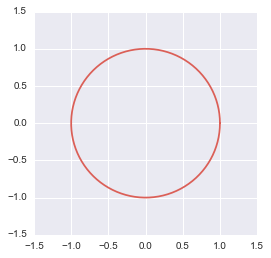

In [22]:
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)

plt.figure()
plt.plot(x, y)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

Then, we will transform each of these point by applying a matrix $\boldsymbol{A}$. This is the goal of the function bellow that take a matrix as input and will draw

- the origin set of unit vector (yellow)
- the transformed set of unit vector (red)
- the eigenvectors (blue)
- the eigenvectors scalled by their eigenvalues (green)

4


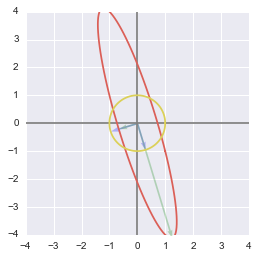

In [23]:
def linearTransformation(transformMatrix):
    # Create original set of unit vectors
    t = np.linspace(0, 2*np.pi, 100)
    x = np.cos(t)
    y = np.sin(t)

    # Calculate eigenvectors and eigenvalues
    eigVecs = np.linalg.eig(transformMatrix)[1]
    eigVals = np.diag(np.linalg.eig(transformMatrix)[0])
    
    # Create vectors of 0 to store new transformed values
    newX = np.zeros(len(x))
    newY = np.zeros(len(x))
    for i in range(len(x)):
        unitVector_i = np.array([x[i], y[i]])
        # Apply the matrix to the vector
        newXY = transformMatrix.dot(unitVector_i)
        newX[i] = newXY[0]
        newY[i] = newXY[1]


    plt.figure()
    plotVectors([eigVecs[:,0], eigVecs[:,1],
                 eigVals[0,0]*eigVecs[:,0],
                 eigVals[1,1]*eigVecs[:,1]],
                cols=['blue', 'blue', 'green','green'])
    plt.plot(newX, newY)
    plt.plot(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()
    
A = np.array([[1,-1], [-1, 4]])
linearTransformation(A)

It is worth noting that the eigenvectors are orthogonal here because the matrix is symmetric. Let's try with a non-symmetric matrix:

In [ ]:
A = np.array([[1,1], [-1, 4]])
linearTransformation(A)

In this case, the eigenvectors are not orthogonal!